# ***Cybersecurity Threat Classification Using Machine Learning***

With the increasing reliance on digital infrastructure, cyber threats such as malware, DDoS attacks, phishing, and intrusions have become more sophisticated. Detecting these threats in real time is critical for network security and data protection.

This project leverages Machine Learning (ML) techniques to classify network traffic as either normal or malicious using the CIC-IDS-2017 dataset. By training models such as Random Forest and Neural Networks, we aim to build an automated threat detection system capable of identifying and mitigating cybersecurity threats with high accuracy.

# ✅ STEP 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ✅ STEP 2: Load & Preprocess the Dataset

# **Load the dataset**

In [2]:
# Step 1: Load multiple CSV files
data_folder = "CIC-IDS- 2017 Data Set"  # Update this path
csv_files = glob.glob(data_folder + "/*.csv")

In [3]:
print(f"Data folder: {data_folder}")
print(f"CSV files found: {csv_files}")

Data folder: CIC-IDS- 2017 Data Set
CSV files found: ['CIC-IDS- 2017 Data Set\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'CIC-IDS- 2017 Data Set\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'CIC-IDS- 2017 Data Set\\Friday-WorkingHours-Morning.pcap_ISCX.csv', 'CIC-IDS- 2017 Data Set\\Monday-WorkingHours.pcap_ISCX.csv', 'CIC-IDS- 2017 Data Set\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'CIC-IDS- 2017 Data Set\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'CIC-IDS- 2017 Data Set\\Tuesday-WorkingHours.pcap_ISCX.csv', 'CIC-IDS- 2017 Data Set\\Wednesday-workingHours.pcap_ISCX.csv']


# **Merging the CSV files**

In [4]:
# Step 2: Read and merge CSV files
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830742,53,94939,4,2,188,226,47,47,47.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [8]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [9]:
df.shape

(2830743, 79)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(2829385, 79)

In [12]:
df.columns  # This will show the exact column names

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [13]:
# Shows attack types and their counts
print("Different Types of Attacks on the Server:")
df[' Label'].value_counts()

Different Types of Attacks on the Server:


 Label
BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

# **Handle missing values**

In [14]:
df = df.dropna(thresh=len(df) * 0.4, axis=1)
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# **Encoding Categorical Variables**

In [15]:
if 'Label' in df.columns:
    label_encoder = LabelEncoder()
    df['Label'] = label_encoder.fit_transform(df['Label'])

In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select numeric columns
numeric_features = df.select_dtypes(include=['number']).columns

# Step 1: Replace infinite values with NaN
df[numeric_features] = df[numeric_features].replace([np.inf, -np.inf], np.nan)

# Step 2: Fill NaN values with the column median
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

# Step 3: Apply StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [17]:
x = df[" Label"]

In [18]:
x

0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
2830738    BENIGN
2830739    BENIGN
2830740    BENIGN
2830741    BENIGN
2830742    BENIGN
Name:  Label, Length: 2829385, dtype: object

In [19]:
arr = x
x.unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [20]:
conditions = [
    df[' Label'].isin(["DDoS", "DoS slowloris", "DoS Slowhttptest", "DoS Hulk", "DoS GoldenEye"]),
    df[' Label'].isin(["Web Attack � Brute Force", "Web Attack � XSS", "Web Attack � Sql Injection"]),
    df[' Label'].isin(['FTP-Patator', 'SSH-Patator']),
]

choices = ['DosFam', 'WebAttack', 'Patator']

# Apply conditions to the 'Label' column
df[' Label'] = np.select(conditions, choices, default=df[' Label'])

In [21]:
df[' Label'].unique()


array(['BENIGN', 'DosFam', 'PortScan', 'Bot', 'Infiltration', 'WebAttack',
       'Patator', 'Heartbleed'], dtype=object)

# ✅ STEP 3: Visualization

<Axes: xlabel=' Label', ylabel='Count'>

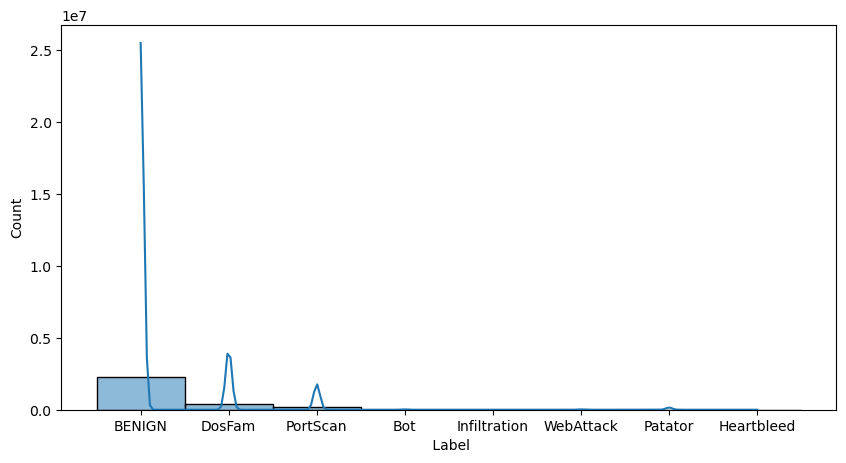

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x=" Label",kde=True)

<Axes: xlabel=' Label', ylabel='count'>

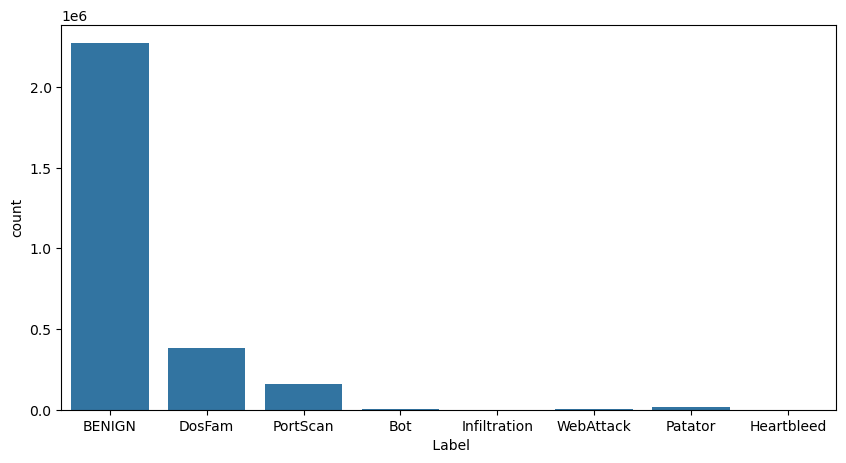

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x=" Label")

In [24]:
label_percentages = df[' Label'].value_counts(normalize=True) * 100
print(label_percentages)


 Label
BENIGN          80.324452
DosFam          13.421256
PortScan         5.617122
Patator          0.488976
WebAttack        0.077049
Bot              0.069485
Infiltration     0.001272
Heartbleed       0.000389
Name: proportion, dtype: float64


In [25]:
df_attack = df.copy()
df[' Label'].unique()

array(['BENIGN', 'DosFam', 'PortScan', 'Bot', 'Infiltration', 'WebAttack',
       'Patator', 'Heartbleed'], dtype=object)

In [26]:
import numpy as np

cond = [
    df_attack[' Label'].isin(["DosFam", "PortScan", "Patator", "WebAttack", "Bot","Infiltration","Heartbleed"]),
]

choic = ['Attack']

# Apply conditions to the 'Label' column
df_attack[' Label'] = np.select(cond, choic, default=df_attack[' Label'])

# Display the modified DataFrame
df_attack.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.559353,-0.439473,-0.009822,-0.010423,-0.053778,-0.007144,-0.281176,-0.210806,-0.280608,-0.245131,...,0.002546,-0.125765,-0.104591,-0.149363,-0.101041,-0.352021,-0.109487,-0.356964,-0.339084,BENIGN
1,2.569690,-0.439469,-0.011155,-0.009421,-0.054378,-0.007141,-0.281176,-0.210806,-0.280608,-0.245131,...,0.002546,-0.125765,-0.104591,-0.149363,-0.101041,-0.352021,-0.109487,-0.356964,-0.339084,BENIGN
2,2.569745,-0.439471,-0.011155,-0.009421,-0.054378,-0.007141,-0.281176,-0.210806,-0.280608,-0.245131,...,0.002546,-0.125765,-0.104591,-0.149363,-0.101041,-0.352021,-0.109487,-0.356964,-0.339084,BENIGN
3,2.087396,-0.439472,-0.011155,-0.009421,-0.054378,-0.007141,-0.281176,-0.210806,-0.280608,-0.245131,...,0.002546,-0.125765,-0.104591,-0.149363,-0.101041,-0.352021,-0.109487,-0.356964,-0.339084,BENIGN
4,2.559244,-0.439473,-0.009822,-0.010423,-0.053778,-0.007144,-0.281176,-0.210806,-0.280608,-0.245131,...,0.002546,-0.125765,-0.104591,-0.149363,-0.101041,-0.352021,-0.109487,-0.356964,-0.339084,BENIGN


<Axes: xlabel=' Label', ylabel='Count'>

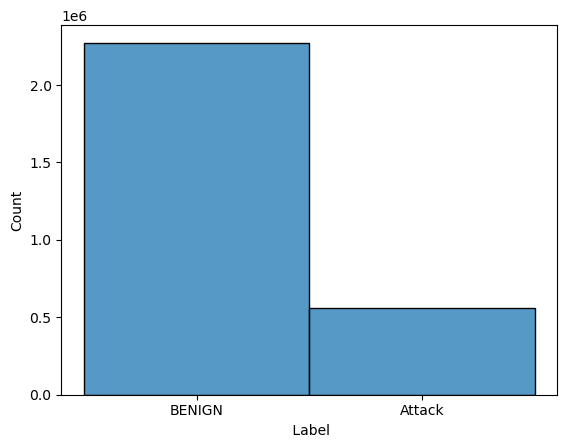

In [27]:
sns.histplot(data=df_attack,x=" Label")

<Axes: xlabel=' Label', ylabel='Count'>

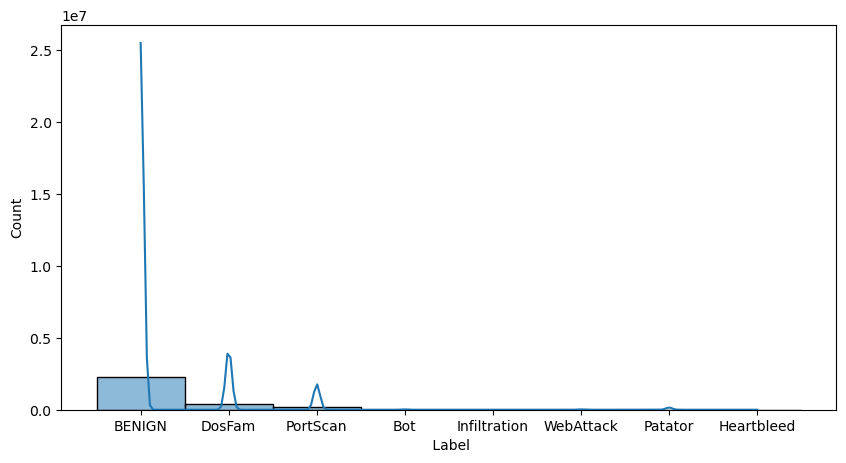

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x=" Label",kde=True)

<Axes: xlabel=' Label', ylabel='Count'>

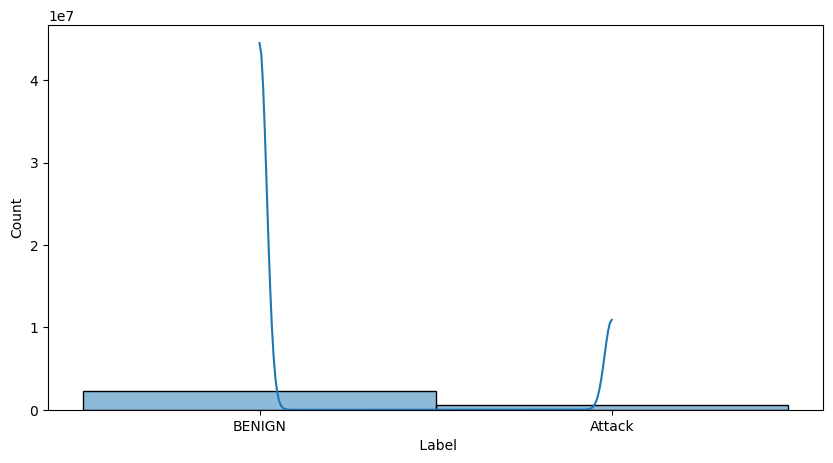

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_attack,x=" Label",kde=True)

# ✅ STEP 4: Spliting and training the Dataset


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
# Assign features (X) and target variable (y)
label_column = ' Label'  # Change this if needed (e.g., 'Attack_Type', 'Category')
if label_column not in df.columns:
    raise KeyError(f"Column '{label_column}' not found in dataset. Use the correct target column.")

X = df.drop(columns=[label_column])  # Features
y = df[label_column]  # Target variable (attack category)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ STEP 5: Train Random Forest Model


In [32]:
# Import Required Libraries
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy_rf:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Model Accuracy: 0.9985
Classification Report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    454538
         Bot       0.95      0.31      0.47       393
      DosFam       1.00      1.00      1.00     75948
  Heartbleed       1.00      1.00      1.00         2
Infiltration       1.00      0.43      0.60         7
     Patator       1.00      1.00      1.00      2767
    PortScan       0.99      1.00      1.00     31786
   WebAttack       0.99      0.83      0.90       436

    accuracy                           1.00    565877
   macro avg       0.99      0.82      0.87    565877
weighted avg       1.00      1.00      1.00    565877

Confusion Matrix:
 [[454203      6    153      0      0      0    174      2]
 [   270    123      0      0      0      0      0      0]
 [   104      0  75843      0      0      0      0      1]
 [     0      0      0      2      0      0      0      0]
 [     4      0      0      0      3      0    

# ✅ STEP 6: Train Neural Network Model


In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Neural Network (MLP Classifier)
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate Model Performance
accuracy_nm = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy_nm:.4f}")

# Evaluate Performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

c:\Users\srini\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Model Accuracy: 0.9985
Accuracy: 0.9900
Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99    454538
         Bot       0.99      0.35      0.52       393
      DosFam       0.98      0.99      0.98     75948
  Heartbleed       1.00      1.00      1.00         2
Infiltration       0.67      0.29      0.40         7
     Patator       0.98      0.98      0.98      2767
    PortScan       0.95      0.97      0.96     31786
   WebAttack       0.89      0.08      0.14       436

    accuracy                           0.99    565877
   macro avg       0.93      0.71      0.75    565877
weighted avg       0.99      0.99      0.99    565877

Confusion Matrix:
 [[451657      1   1341      0      1     35   1499      4]
 [   254    139      0      0      0      0      0      0]
 [   933      0  75013      0      0      2      0      0]
 [     0      0      0      2      0      0      0      0]
 [     5      0      0      0 

# ✅ STEP 7: Compare Model Performance


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [47]:
def evaluate_model(model_name, y_test, y_pred):
    print(f"📊 Performance of {model_name}:")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"✅ Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"✅ F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

In [48]:
# Evaluate Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)

# Evaluate Neural Network
evaluate_model("Neural Network", y_test, y_pred_nn)

📊 Performance of Random Forest:
✅ Accuracy: 0.9985
✅ Precision: 0.9985
✅ Recall: 0.9985
✅ F1-Score: 0.9984

Classification Report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    454538
         Bot       0.95      0.31      0.47       393
      DosFam       1.00      1.00      1.00     75948
  Heartbleed       1.00      1.00      1.00         2
Infiltration       1.00      0.43      0.60         7
     Patator       1.00      1.00      1.00      2767
    PortScan       0.99      1.00      1.00     31786
   WebAttack       0.99      0.83      0.90       436

    accuracy                           1.00    565877
   macro avg       0.99      0.82      0.87    565877
weighted avg       1.00      1.00      1.00    565877

--------------------------------------------------
📊 Performance of Neural Network:
✅ Accuracy: 0.9900
✅ Precision: 0.9900
✅ Recall: 0.9900
✅ F1-Score: 0.9896

Classification Report:
               precision    recall

# ✅ STEP 8: Visualization - Confusion Matrix


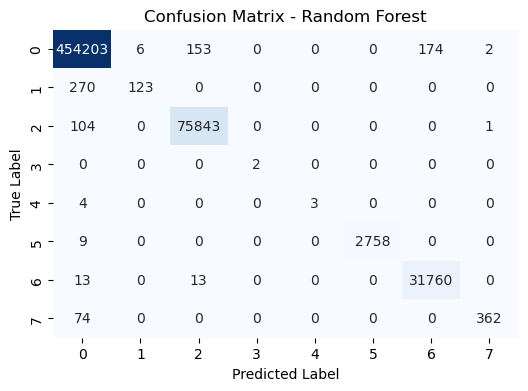

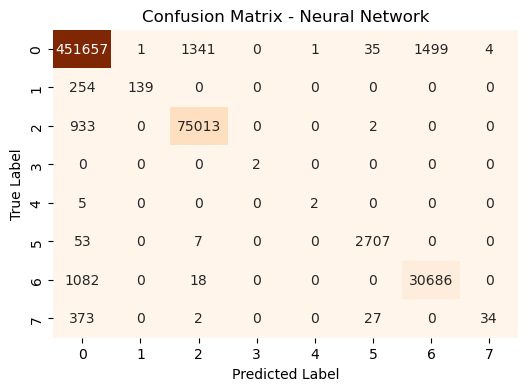

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Confusion Matrix for Neural Network
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ✅ STEP 9: Visualization - Feature Importance


C:\Users\srini\AppData\Local\Temp\ipykernel_17768\1893282543.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx][:10], y=features[sorted_idx][:10], palette="viridis")


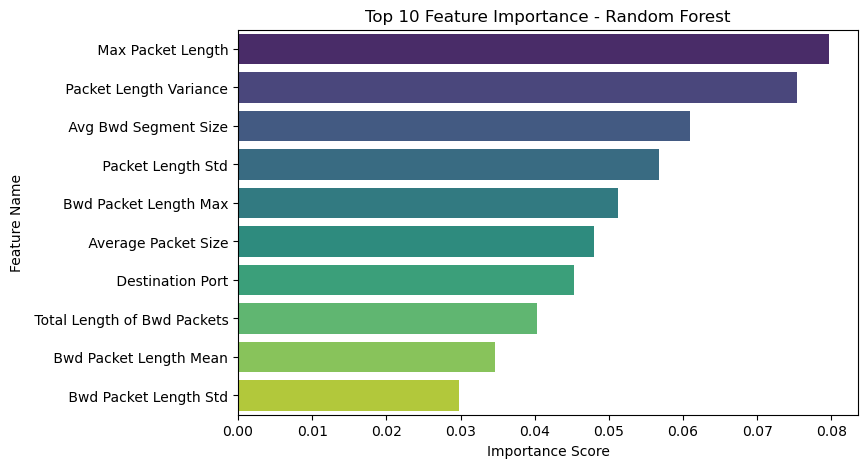

In [50]:
# Get feature importance
feature_importance = rf_model.feature_importances_
features = X_train.columns  # Assuming X_train is a DataFrame

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance[sorted_idx][:10], y=features[sorted_idx][:10], palette="viridis")
plt.title("Top 10 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


# ✅ STEP 10: Save Results & Model


C:\Users\srini\AppData\Local\Temp\ipykernel_17768\862130676.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=performance_df, palette="coolwarm")


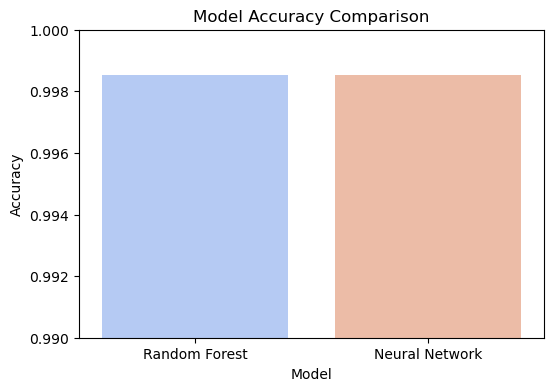

In [61]:
# Create a DataFrame to compare model performance
performance_df = pd.DataFrame({
    "Model": ["Random Forest", "Neural Network"],
    "Accuracy": [accuracy_rf, accuracy_nm]
})

# Plot performance
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=performance_df, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylim(0.99, 1)
plt.show()
